In [2]:
# it can be decommended when the IDE is not able to recognize the project's root directory
# %cd ../../../..

In [3]:
import os
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [4]:
base_results_path = "dotless_arabic/experiments/ngrams/results"
results_dict = {}
for dataset_name in os.listdir(base_results_path):
    for results_file in os.listdir(f"{base_results_path}/{dataset_name}"):
        if not os.path.isfile(f"{base_results_path}/{dataset_name}/{results_file}"):
            continue
        with open(f"{base_results_path}/{dataset_name}/{results_file}") as results:
            tokenizer_class = results_file.split(".")[-2].split("_")[-1]
            text_type = results_file.split(".")[-2].split("_")[1]
            content = results.read()
            ngrams_results = content[
                content.index("TRAINING STARTED") : content.index("TRAINING FINISHED")
            ]
            ngrams_results = "\n".join(ngrams_results.splitlines()[3:-2])
            ngrams_results = dict(list(json.loads(ngrams_results).values())[0])
            if not results_dict.get(tokenizer_class):
                results_dict[tokenizer_class] = {}
            if not results_dict[tokenizer_class].get(dataset_name):
                results_dict[tokenizer_class][dataset_name] = {}
            results_dict[tokenizer_class][dataset_name].update(
                {
                    text_type: {
                        int(order): {
                            "ppl": float(ngrams_results[order]["perplexity_with_OOVs"]),
                            "ngrams": int(
                                ngrams_results[order]["ngram_counts"].replace(",", "")
                            ),
                            "test OOVs": int(
                                ngrams_results[order]["counts_of_OOVs"].replace(",", "")
                            ),
                        }
                        for order in ngrams_results.keys()
                    }
                }
            )
pprint(results_dict.keys())

dict_keys(['DisjointLetterTokenizer', 'FarasaMorphologicalTokenizer', 'WordTokenizer', 'CharacterTokenizer'])


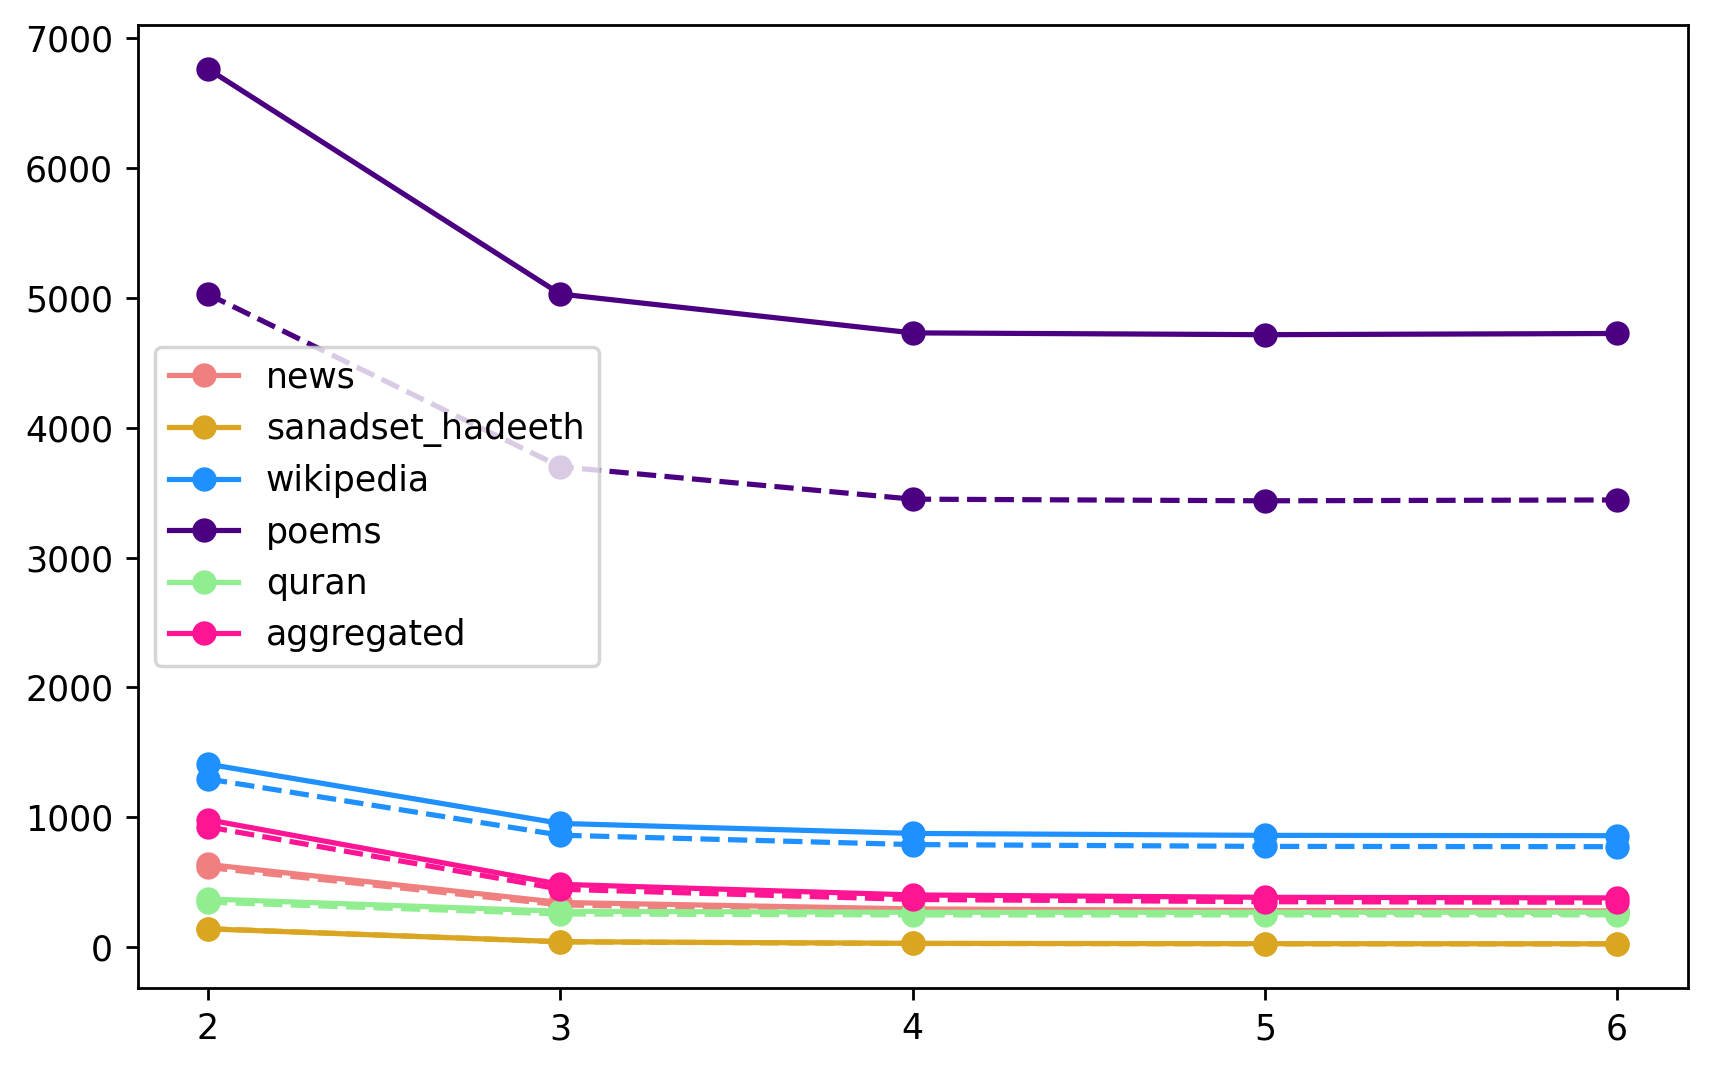

In [5]:
tok = results_dict['WordTokenizer']
colors = [
    'lightcoral',
    'goldenrod',
    'dodgerblue',
    'indigo',
    'lightgreen',
    'deeppink',
]
fig = plt.figure(figsize=(8, 5),dpi=250)
plt.xticks(range(2,7))
for i,dataset in enumerate(tok):
    for text_type in tok[dataset]:
        plt.plot(
            range(2,7),
            [tok[dataset][text_type][order]['ppl'] for order in tok[dataset][text_type]],
            'o',
            linestyle = 'dashed' if text_type.startswith('un') else 'solid',
            color = colors[i],
            label=dataset.replace('_dataset','') if not text_type.startswith('un') else '',
    )
plt.legend()

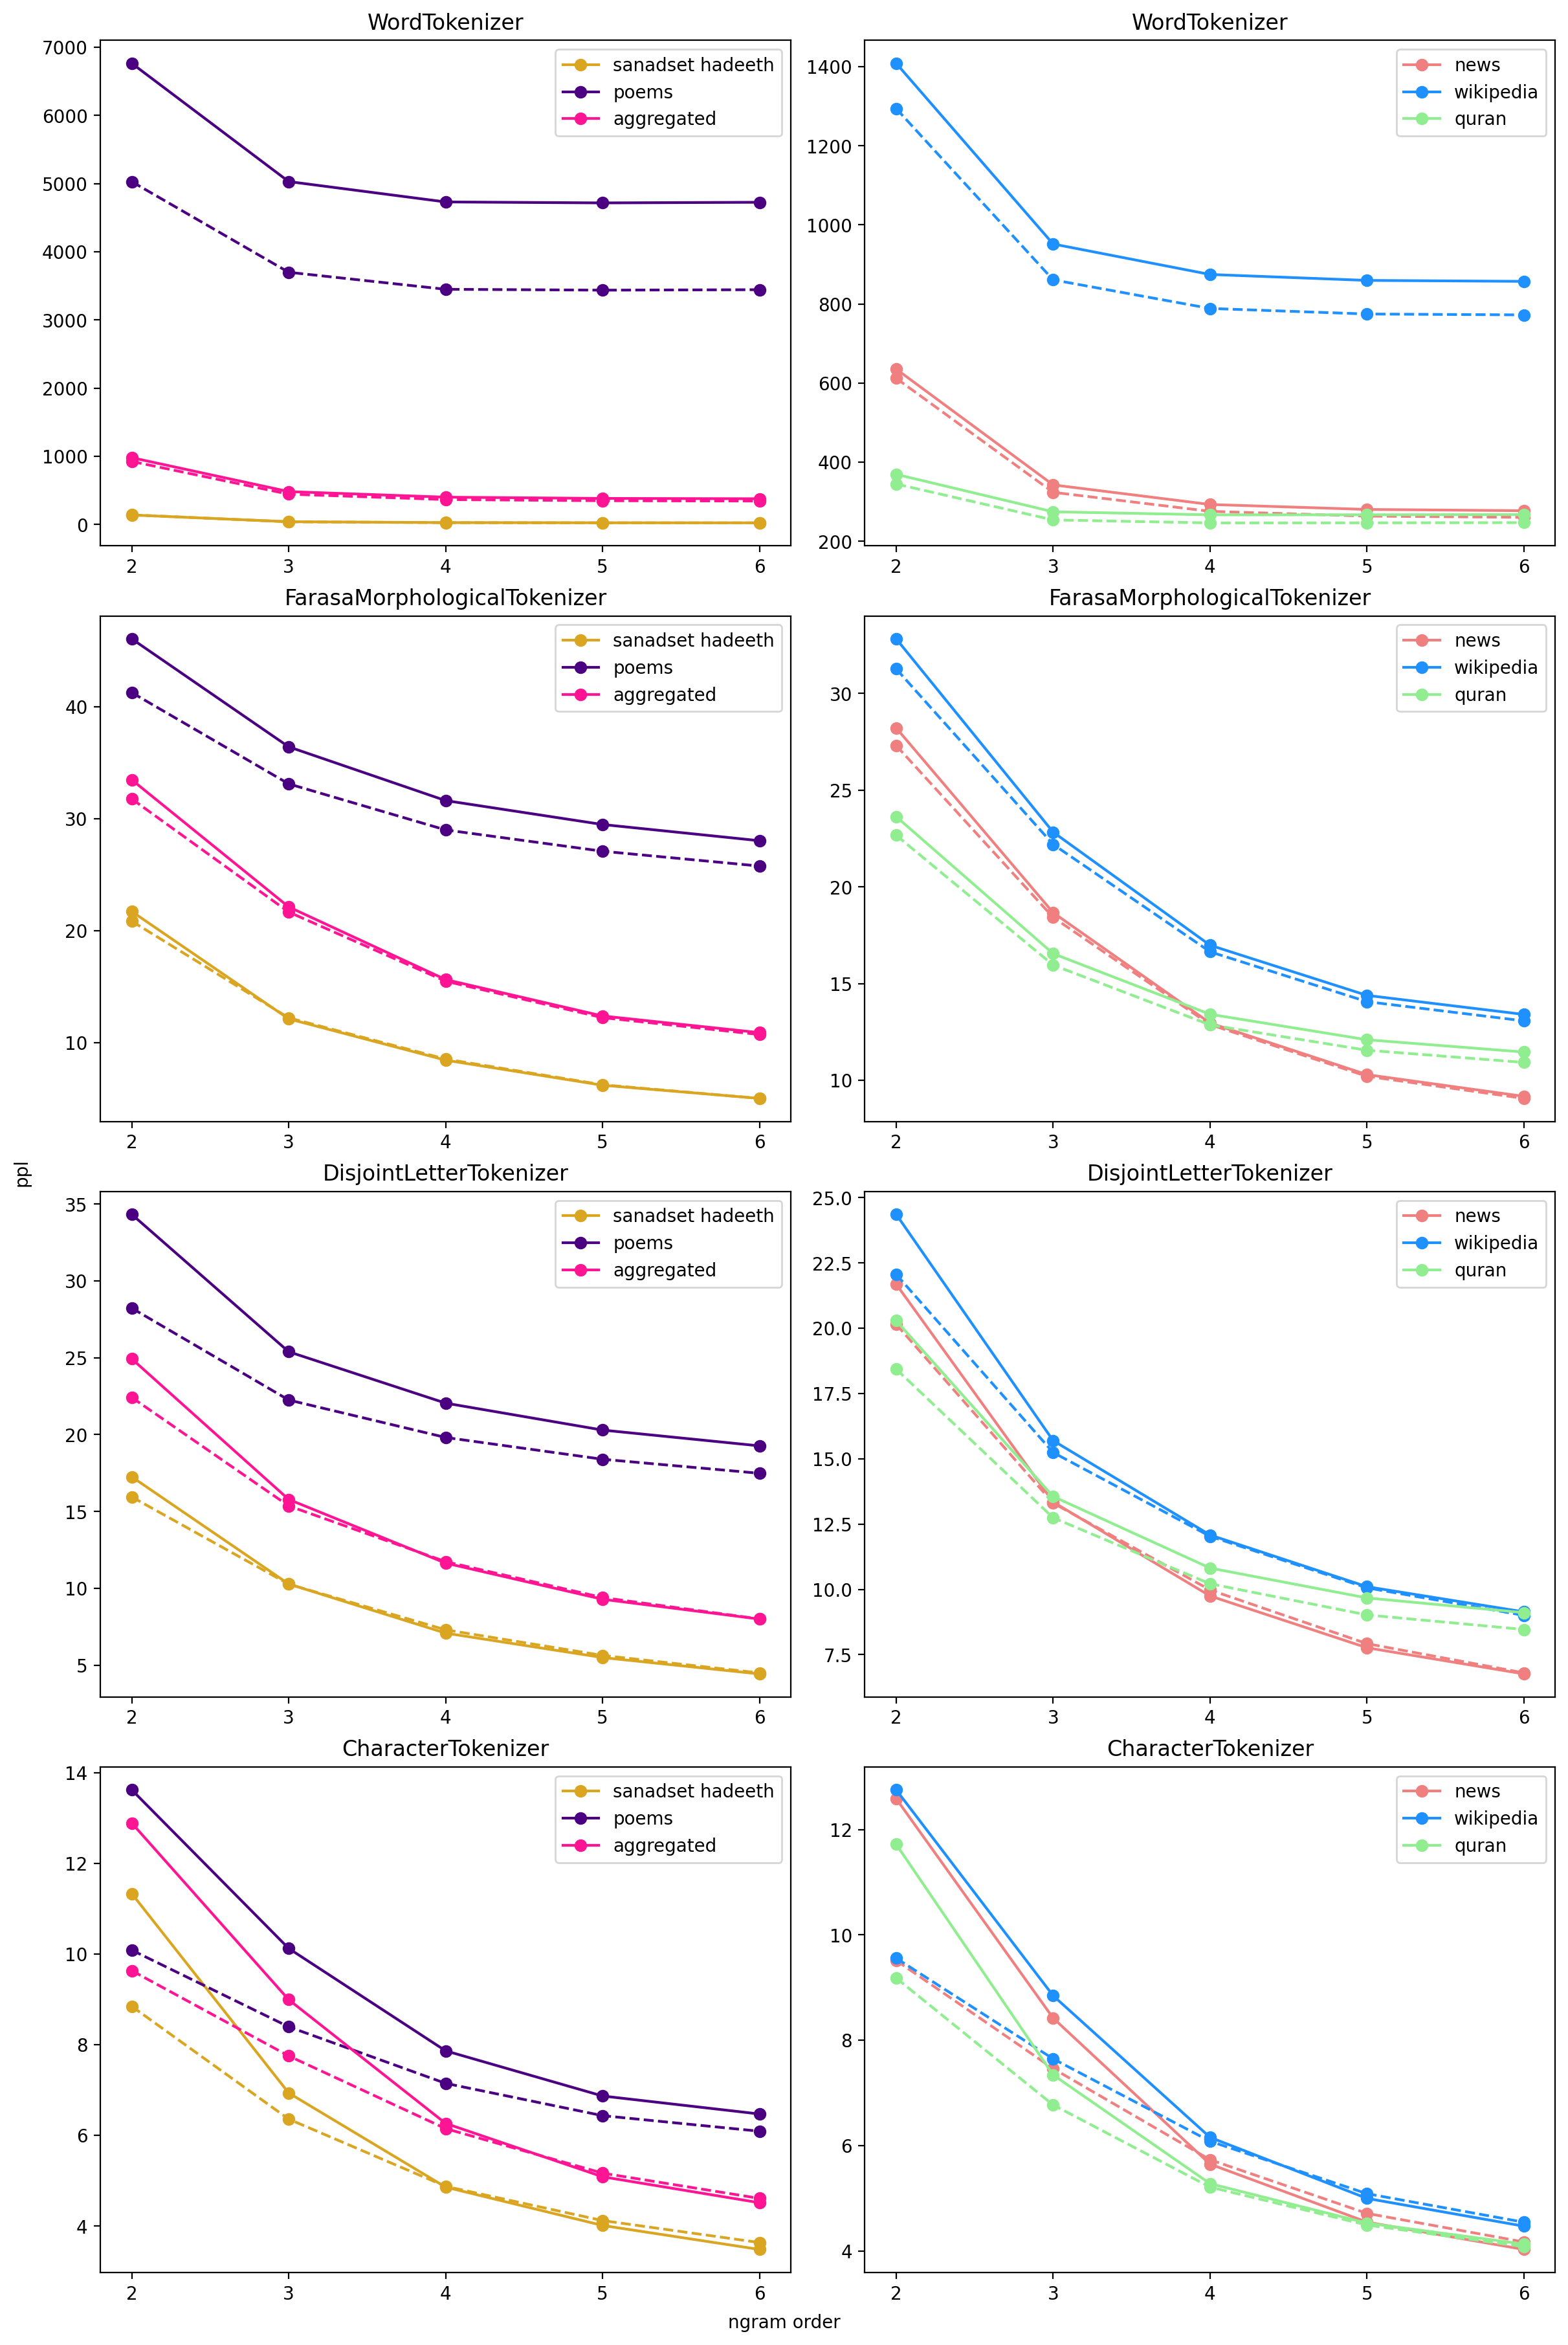

In [6]:
fontsize = 10
figsize = (12, 18)
figure, axis = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=figsize,
    dpi=200,
    layout="constrained",
)

plt.rc("font", size=fontsize)
figure.supxlabel("ngram order", fontsize=fontsize)
figure.supylabel("ppl", fontsize=fontsize)

for i in range(4):
    for j in range(2):
        axis[i, j].set_xticks(range(2, 7))

for tokenizer_index, tokenizer_class in enumerate(sorted(results_dict,reverse=True)):
    for dataset_index, dataset_name in enumerate(results_dict[tokenizer_class]):
        for text_type in tok[dataset]:
            if text_type.startswith("un"):
                axis[tokenizer_index, (dataset_index + 1) % 2].plot(
                    range(2, 7),
                    [
                        results_dict[tokenizer_class][dataset_name][text_type][order]["ppl"]
                        for order in results_dict[tokenizer_class][dataset_name][text_type]
                    ],
                    "o",
                    linestyle="dashed",
                    color=colors[dataset_index],
                )
            else:
                axis[tokenizer_index, (dataset_index + 1) % 2].plot(
                    range(2, 7),
                    [
                        results_dict[tokenizer_class][dataset_name][text_type][order]["ppl"]
                        for order in results_dict[tokenizer_class][dataset_name][text_type]
                    ],
                    "o",
                    linestyle="solid",
                    color=colors[dataset_index],
                    label=dataset_name.replace("_dataset", "").replace('_',' '),
                )
            axis[tokenizer_index, dataset_index % 2].title.set_text(tokenizer_class)

for i in range(4):
    for j in range(2):
        axis[i, j].legend(loc="upper right",fontsize = f'{fontsize}')

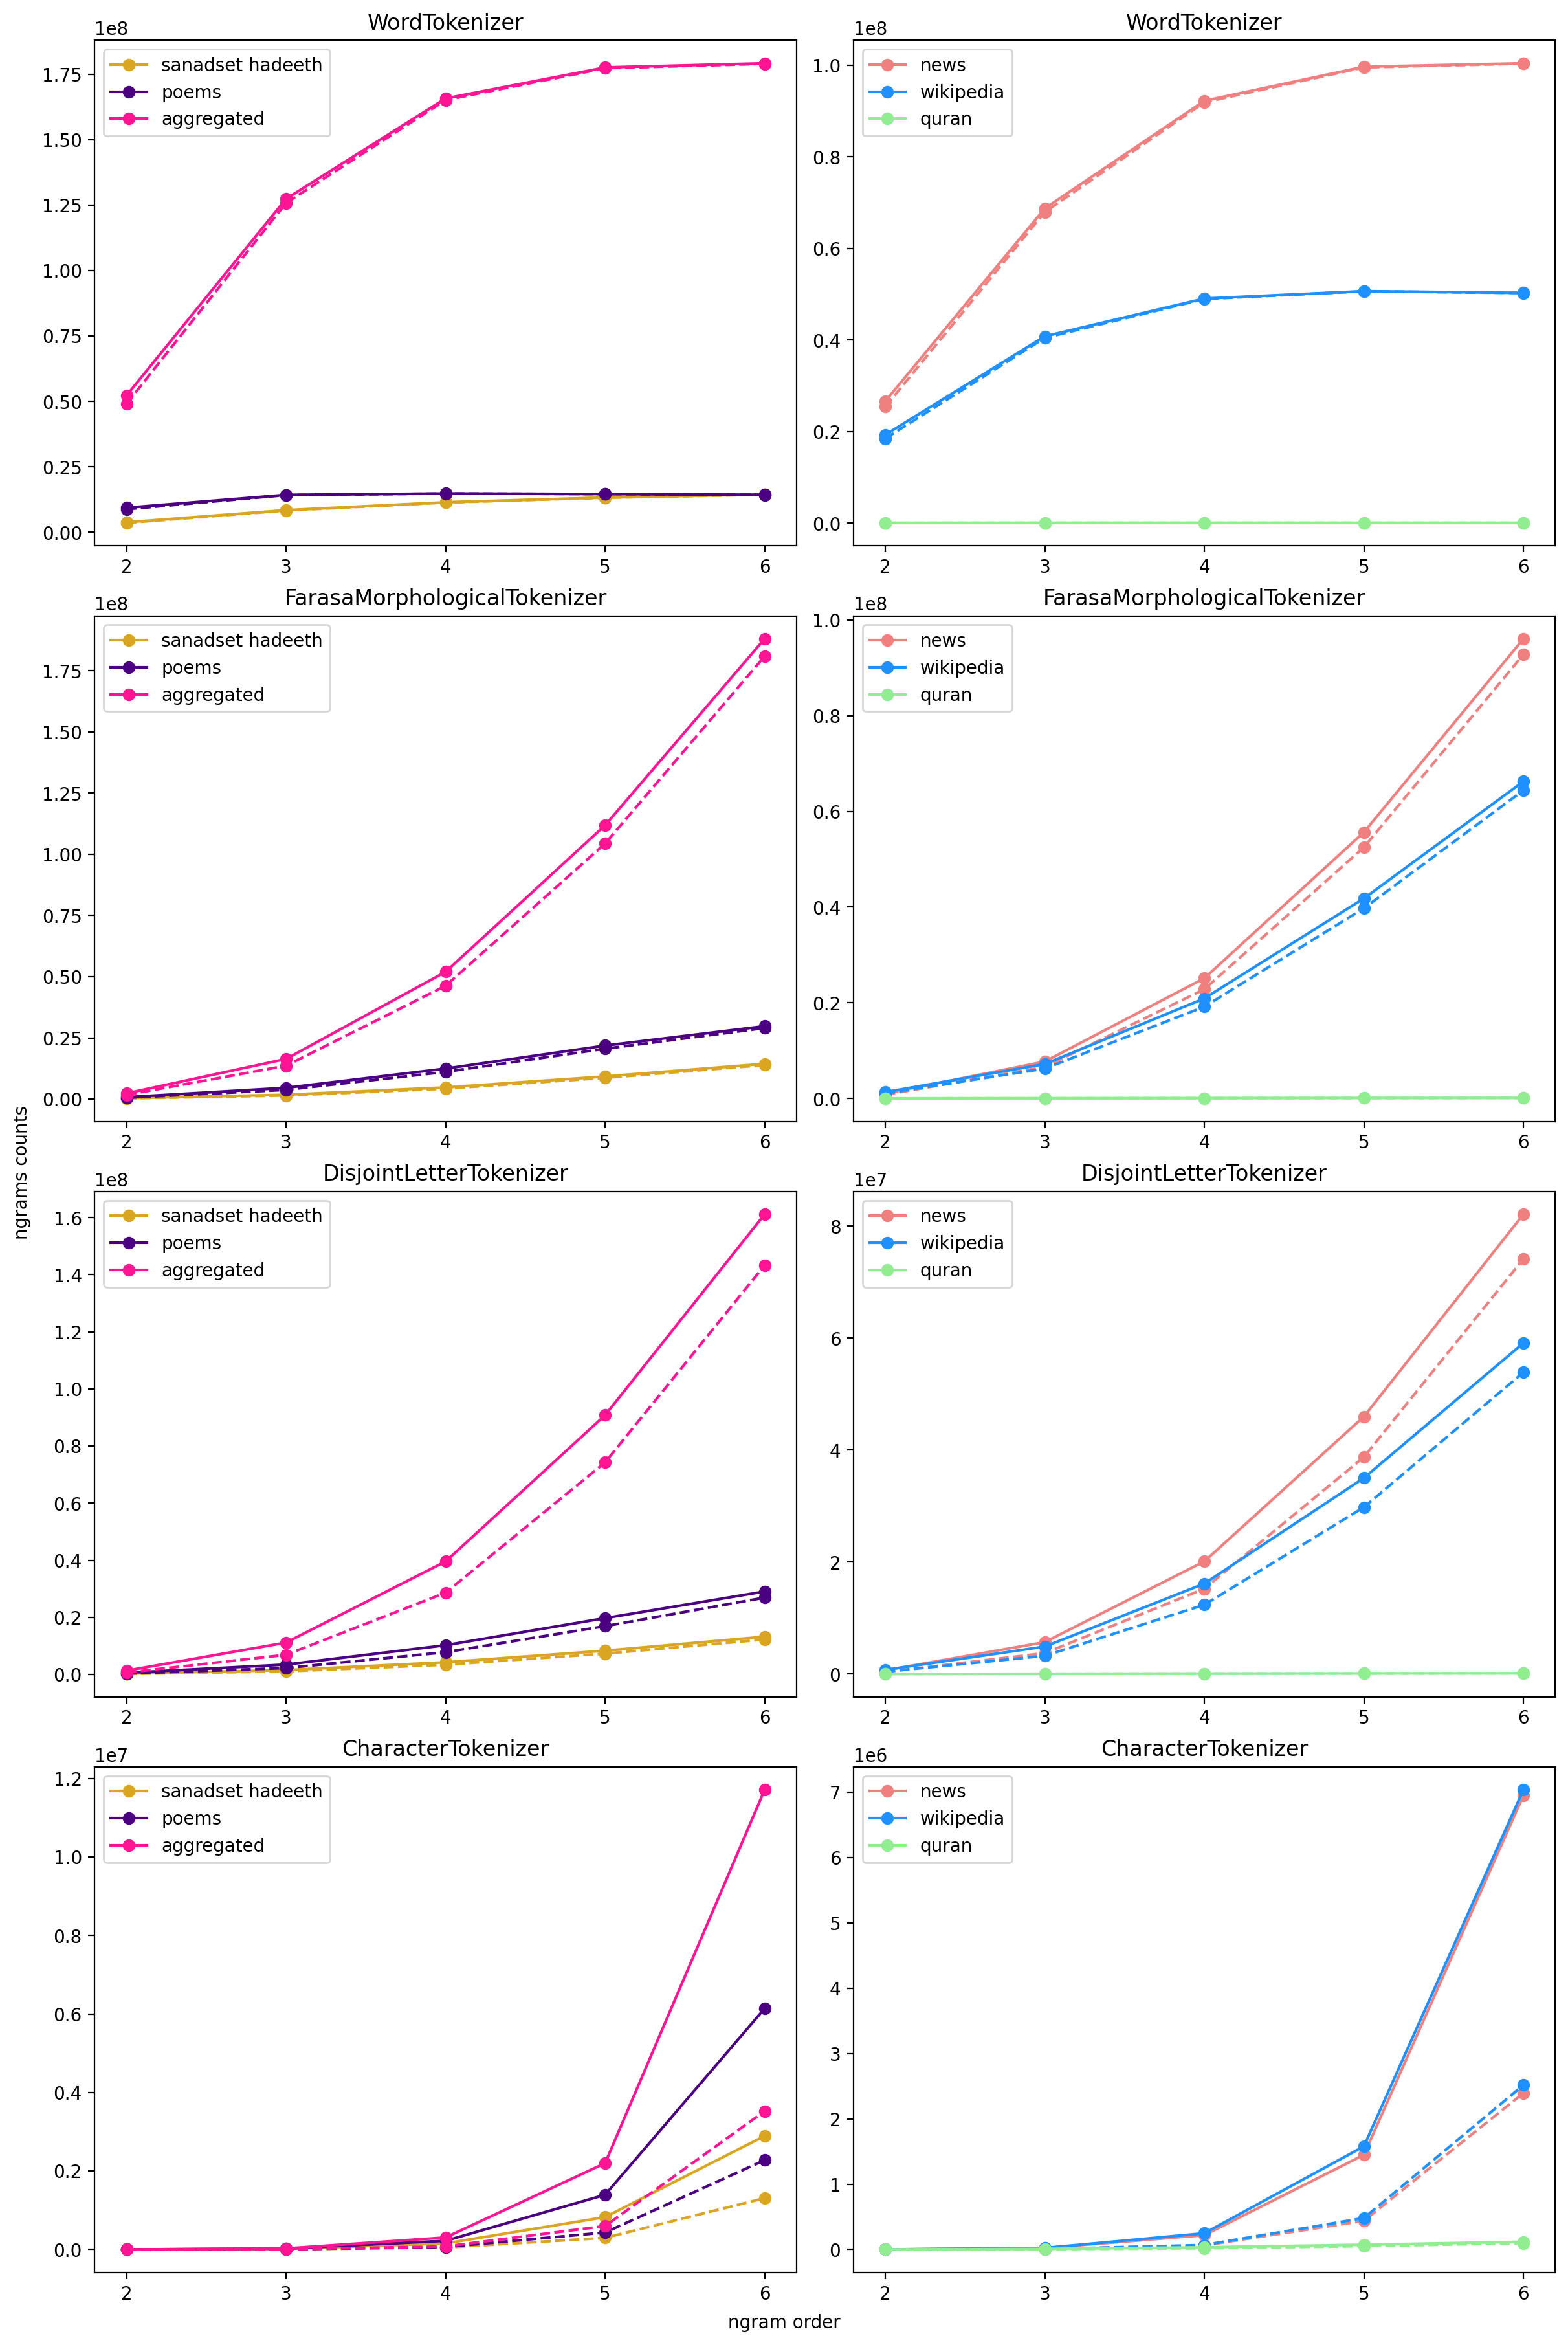

In [7]:
fontsize = 10
figsize = (12, 18)
figure, axis = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=figsize,
    dpi=200,
    layout="constrained",
)

plt.rc("font", size=fontsize)
figure.supxlabel("ngram order", fontsize=fontsize)
figure.supylabel("ngrams counts", fontsize=fontsize)

for i in range(4):
    for j in range(2):
        axis[i, j].set_xticks(range(2, 7))

for tokenizer_index, tokenizer_class in enumerate(sorted(results_dict,reverse=True)):
    for dataset_index, dataset_name in enumerate(results_dict[tokenizer_class]):
        for text_type in tok[dataset]:
            if text_type.startswith("un"):
                axis[tokenizer_index, (dataset_index + 1) % 2].plot(
                    range(2, 7),
                    [
                        results_dict[tokenizer_class][dataset_name][text_type][order]["ngrams"]
                        for order in results_dict[tokenizer_class][dataset_name][text_type]
                    ],
                    "o",
                    linestyle="dashed",
                    color=colors[dataset_index],
                )
            else:
                axis[tokenizer_index, (dataset_index + 1) % 2].plot(
                    range(2, 7),
                    [
                        results_dict[tokenizer_class][dataset_name][text_type][order]["ngrams"]
                        for order in results_dict[tokenizer_class][dataset_name][text_type]
                    ],
                    "o",
                    linestyle="solid",
                    color=colors[dataset_index],
                    label=dataset_name.replace("_dataset", "").replace('_',' '),
                )
            axis[tokenizer_index, dataset_index % 2].title.set_text(tokenizer_class)

for i in range(4):
    for j in range(2):
        axis[i, j].legend(loc="upper left",fontsize = f'{fontsize}')

In [8]:
for tokenizer in sorted(results_dict,reverse=True)[:-1]: # ignore characters as they have ZERO OOVs
    for dataset in results_dict[tokenizer]:
        dotted_OOVs = results_dict[tokenizer][dataset]['dotted'][2]['test OOVs']
        dotless_OOVs = results_dict[tokenizer][dataset]['undotted'][2]['test OOVs']
        OOVs_ratio = (dotless_OOVs/dotted_OOVs)*100
        print(tokenizer,dataset,f'{dotted_OOVs=:,}',f'{dotless_OOVs=:,}',f'{OOVs_ratio=:.2f}')
    print('-'*120)

WordTokenizer news_dataset dotted_OOVs=39,177 dotless_OOVs=26,507 OOVs_ratio=67.66
WordTokenizer sanadset_hadeeth_dataset dotted_OOVs=13,273 dotless_OOVs=8,619 OOVs_ratio=64.94
WordTokenizer wikipedia_dataset dotted_OOVs=57,329 dotless_OOVs=40,901 OOVs_ratio=71.34
WordTokenizer poems_dataset dotted_OOVs=34,577 dotless_OOVs=20,080 OOVs_ratio=58.07
WordTokenizer quran_dataset dotted_OOVs=910 dotless_OOVs=786 OOVs_ratio=86.37
WordTokenizer aggregated_dataset dotted_OOVs=94,216 dotless_OOVs=60,093 OOVs_ratio=63.78
------------------------------------------------------------------------------------------------------------------------
FarasaMorphologicalTokenizer news_dataset dotted_OOVs=17,997 dotless_OOVs=13,680 OOVs_ratio=76.01
FarasaMorphologicalTokenizer sanadset_hadeeth_dataset dotted_OOVs=4,253 dotless_OOVs=2,948 OOVs_ratio=69.32
FarasaMorphologicalTokenizer wikipedia_dataset dotted_OOVs=32,153 dotless_OOVs=25,104 OOVs_ratio=78.08
FarasaMorphologicalTokenizer poems_dataset dotted_OOVs